# Data Science Challenge of the Day

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

## Sept 23 - Using Python, create a line chart with both the daily and 7-day moving average for the close price for Apple stock.

#### Read-In Data 
Source: Yahoo Finance

In [2]:
aapl = pd.read_csv('./data/AAPL.csv')

#### Set Date as Index and Sort

In [5]:
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl.set_index('Date', inplace = True)
aapl.sort_index(inplace = True)

#### Define Rolling Averages

In [22]:
daily_average = aapl.rolling(window = 1).mean()
weekly_average = aapl.rolling(window = 7).mean()

#### Plot Close Prices

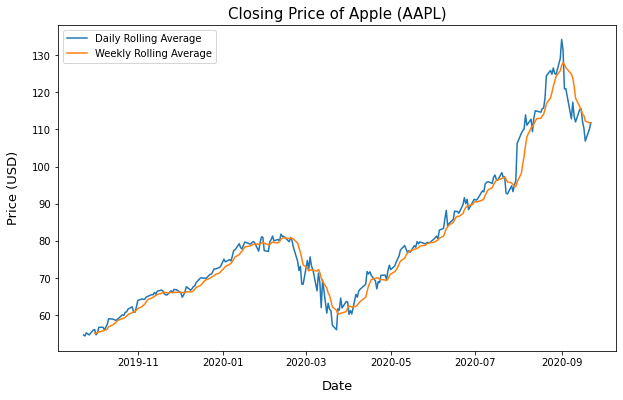

In [31]:
plt.figure(figsize = (10, 6))
plt.plot(daily_average['Close'], label = 'Daily Rolling Average')
plt.plot(weekly_average['Close'], label = 'Weekly Rolling Average')
plt.title('Closing Price of Apple (AAPL)', fontdict = {'fontsize':15})
plt.xlabel('Date', fontdict = {'fontsize':13}, labelpad = 12)
plt.ylabel('Price (USD)', fontdict = {'fontsize':13}, labelpad = 12)
plt.legend();

## Sept 23 - Given the following dataset, can you create a decision tree to predict customer churn? For simplicity, you can set the maximum depth of the decision tree to 4. For the purpose of this exercise, you do not need to optimize the model.

In [82]:
churn = pd.read_csv('./data/teleco_user_data.csv')
churn.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [85]:
churn = churn[churn['TotalCharges'] != ' ']

In [91]:
churn['TotalCharges'] = churn['TotalCharges'].map(float)

In [93]:
X = churn.drop(columns = ['customerID', 'Churn'])
X = pd.get_dummies(X)
y = churn['Churn']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [95]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3946,0,9,58.50,539.85,1,0,1,0,1,0,...,1,1,0,0,1,0,0,0,0,1
3394,0,26,61.55,1581.95,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1635,0,3,69.95,220.45,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
4088,0,7,73.60,520.00,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1886,0,67,60.40,3953.70,0,1,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0


In [99]:
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train, y_train);
preds = tree.predict(X_test)

In [100]:
tree.score(X_train,y_train)

0.7990654205607477

In [101]:
tree.score(X_test, y_test)

0.785781990521327

In [113]:
features = pd.DataFrame({'Feature Importance':tree.feature_importances_}, index = X_train.columns)

In [116]:
features[features['Feature Importance']!= 0].sort_values(by = 'Feature Importance', ascending = False)

,Feature Importance
Contract_Month-to-month,0.564468
InternetService_Fiber optic,0.169639
tenure,0.153058
TotalCharges,0.033972
MonthlyCharges,0.021304
TechSupport_No internet service,0.020695
PaymentMethod_Electronic check,0.018953
PhoneService_Yes,0.010584
StreamingMovies_Yes,0.003810
Contract_One year,0.003518


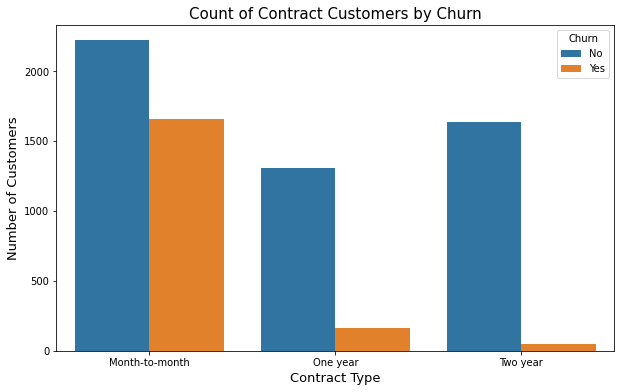

In [129]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Contract', hue = 'Churn', data = churn);
plt.title('Count of Contract Customers by Churn', fontdict = {'fontsize':15})
plt.xlabel('Contract Type', fontdict = {'fontsize':13})
plt.ylabel('Number of Customers', fontdict = {'fontsize':13});

## Sept 24 - U.S. state population statistics

Answer the following questions:

1. Calculate the birth rate and death rate for each state. For the purposes of this question you can define the rate as the # of births/deaths divided by the total population.
2. Create a new column appended to the first dataset with the net population change (births-deaths) by state.
3. Using the column from (2), project out the future population by state in 5 years, assuming the population change remains the same (on an absolute/n-count basis). You can assume each state's net transfer in/out rate from folks moving is 0 for this question's sake.

In [11]:
df1 = pd.read_csv('./data/us_state_births.csv')
df2 = pd.read_csv('./data/us_state_populations.csv')

In [12]:
full_df = pd.merge(df1, df2, on = 'State')

In [13]:
full_df.head(2)

,State,Births,Deaths,Population
0,Alabama,58941,53238,4887871
1,Alaska,10445,4411,737438


In [14]:
full_df['birth_rate'] = full_df['Births']/full_df['Population']

In [15]:
full_df['death_rate'] = full_df['Deaths']/full_df['Population']

In [16]:
full_df.head()

,State,Births,Deaths,Population,birth_rate,death_rate
0,Alabama,58941,53238,4887871,0.012059,0.010892
1,Alaska,10445,4411,737438,0.014164,0.005982
2,Arizona,81872,57758,7171646,0.011416,0.008054
3,Arkansas,37520,32588,3013825,0.012449,0.010813
4,California,471658,268189,39865590,0.011831,0.006727


In [17]:
full_df['net_pop_change'] = full_df['Births'] - full_df['Deaths']

In [18]:
full_df.head()

,State,Births,Deaths,Population,birth_rate,death_rate,net_pop_change
0,Alabama,58941,53238,4887871,0.012059,0.010892,5703
1,Alaska,10445,4411,737438,0.014164,0.005982,6034
2,Arizona,81872,57758,7171646,0.011416,0.008054,24114
3,Arkansas,37520,32588,3013825,0.012449,0.010813,4932
4,California,471658,268189,39865590,0.011831,0.006727,203469


In [20]:
full_df['proj_5yr_pop'] = full_df['Population'] + (5 * full_df['net_pop_change'])

In [21]:
full_df.head()

,State,Births,Deaths,Population,birth_rate,death_rate,net_pop_change,proj_5yr_pop
0,Alabama,58941,53238,4887871,0.012059,0.010892,5703,4916386
1,Alaska,10445,4411,737438,0.014164,0.005982,6034,767608
2,Arizona,81872,57758,7171646,0.011416,0.008054,24114,7292216
3,Arkansas,37520,32588,3013825,0.012449,0.010813,4932,3038485
4,California,471658,268189,39865590,0.011831,0.006727,203469,40882935


## Pandas Challenge

In [3]:
df = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6]})

In [4]:
df.head()

,a,b
0,1,4
1,2,5
2,3,6


In [5]:
## Rewrite this Code in a More "Pandas" Format
for x in range(len(df)):
    df.loc[x, 'c'] = df.loc[x,'a'] * df.loc[x,'b']

In [6]:
df.head()

,a,b,c
0,1,4,4.0
1,2,5,10.0
2,3,6,18.0


In [7]:
df['d'] = df['a'] * df['b']

In [8]:
df.head()

,a,b,c,d
0,1,4,4.0,4
1,2,5,10.0,10
2,3,6,18.0,18
